Redcard project:
- This project is originated from an article published in Nature (2015). ["Crowdsourced research: Many hands make tight work
"](https://www.nature.com/news/crowdsourced-research-many-hands-make-tight-work-1.18508)
- Question: are football (soccer) referees more likely to give red cards to players with dark skin than to players with light skin?
- Data: dyads of players and referees. [Variable definations](files/var.txt)
    - `Alpha_3`: refCountry code

## Load the data

In [1]:
import os
os.getcwd()

'/Users/xiaonan/Documents/redcards'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CrowdstormingDataJuly1st.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146028 entries, 0 to 146027
Data columns (total 28 columns):
playerShort      146028 non-null object
player           146028 non-null object
club             146028 non-null object
leagueCountry    146028 non-null object
birthday         146028 non-null object
height           145765 non-null float64
weight           143785 non-null float64
position         128302 non-null object
games            146028 non-null int64
victories        146028 non-null int64
ties             146028 non-null int64
defeats          146028 non-null int64
goals            146028 non-null int64
yellowCards      146028 non-null int64
yellowReds       146028 non-null int64
redCards         146028 non-null int64
photoID          124621 non-null object
rater1           124621 non-null float64
rater2           124621 non-null float64
refNum           146028 non-null int64
refCountry       146028 non-null int64
Alpha_3          146027 non-null object
meanIAT        

In [4]:
df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
df.sample(5)

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
121485,peter-crouch,Peter Crouch,Stoke City,England,30.01.1981,202.0,80.0,Center Forward,2,1,...,0.00,2569,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
30874,glen-johnson,Glen Johnson,Liverpool FC,England,23.08.1984,178.0,70.0,Right Fullback,1,1,...,0.75,565,44,ENGL,0.326690,44791.0,0.000010,0.356446,46916.0,0.000037
45994,marti,Martí,RCD Mallorca,Spain,28.04.1975,180.0,76.0,Defensive Midfielder,8,2,...,0.25,865,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
80675,paul-verhaegh,Paul Verhaegh,FC Augsburg,Germany,01.09.1983,178.0,72.0,Right Fullback,1,0,...,0.00,1744,58,BEL,0.362720,3219.0,0.000128,0.568785,3351.0,0.000575
91166,johannes-wurtz,Johannes Wurtz,Werder Bremen,Germany,19.06.1992,182.0,76.0,NaN,2,1,...,0.00,1957,8,DEU,0.336628,7749.0,0.000055,0.335967,7974.0,0.000225


## Exploratory data analysis

In [17]:
n1 = df['playerShort'].nunique()
n2 = df['club'].nunique()
n3 = df['refNum'].nunique()
n4 = df['Alpha_3'].nunique()

print('There are ' + str(n1) + ' number of players from '+str(n2)+' clubs.')
print('There are ' + str(n3) + ' number of referees from '+str(n4)+' countries.')

There are 2053 number of players from 118 clubs.
There are 3147 number of referees from 160 countries.


In [24]:
# distribution of redCards: num of redCards player i received from referee j

print(df.redCards.value_counts())
print('')
print('The share of zero in the sample is %.3f' % ((df.redCards==0).mean()) )

0    114002
1      1432
2        23
Name: redCards, dtype: int64

The share of zero in the sample is 0.987


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


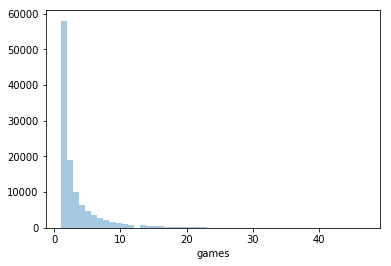

In [20]:
# distribution of number of games at dyads level

sns.distplot(df.games, kde=False)
plt.show()

### Player level analysis

In [87]:
# collapse player-referee sample to player level

dfplayer = df.groupby('playerShort').agg({'games':'sum',
                                          'yellowCards':'sum',
                                          'redCards':'sum',
                                          'position':'first'})
dfplayer.sample(5)

,games,yellowCards,redCards,position
playerShort,,,,
per-skjelbred,223,16,0,Attacking Midfielder
helder_5,86,16,0,Right Fullback
anthony-reveillere,563,91,1,Right Fullback
anders-lindegaard,100,1,0,Goalkeeper
alvaro_10,136,9,0,Center Forward


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


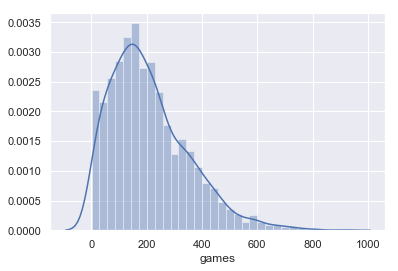

In [64]:
# Distribution: number of games played by each player

sns.distplot(dfplayer['games'])

In [95]:
# Summary statistics: number of games, redCards or yellowCards

print('The number of players who received red card(s): %.0f' % (dfplayer['redCards']>0).sum() )
print('The number of players who received more than 1 red card(s): %.0f' % (dfplayer['redCards']>1).sum() )
dfplayer[['games', 'yellowCards', 'redCards']].describe().round(2)

The number of players who received red card(s): 1010
The number of players who received more than 1 red card(s): 449


,games,yellowCards,redCards
count,2053.00,2053.00,2053.00
mean,207.78,27.41,0.89
std,141.60,24.08,1.26
min,1.00,0.00,0.00
25%,103.00,10.00,0.00
50%,180.00,21.00,0.00
75%,286.00,39.00,1.00
max,914.00,197.00,13.00


In [91]:
# Potential outliers: who played the most games

display( dfplayer[dfplayer['games']==dfplayer['games'].max()] )

,games,yellowCards,redCards,position
playerShort,,,,
frank-lampard,914,86,2,Center Midfielder


In [85]:
# check the dyads for 'frank-lampard'
df[df['playerShort']=='frank-lampard'].sort_values(by='games').tail()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
2010,frank-lampard,Frank Lampard,Chelsea FC,England,20.06.1978,183.0,77.0,Center Midfielder,33,23,...,0.25,77,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037
54686,frank-lampard,Frank Lampard,Chelsea FC,England,20.06.1978,183.0,77.0,Center Midfielder,34,17,...,0.25,1095,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037
87532,frank-lampard,Frank Lampard,Chelsea FC,England,20.06.1978,183.0,77.0,Center Midfielder,36,20,...,0.25,1909,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037
131655,frank-lampard,Frank Lampard,Chelsea FC,England,20.06.1978,183.0,77.0,Center Midfielder,38,26,...,0.25,2803,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037
97628,frank-lampard,Frank Lampard,Chelsea FC,England,20.06.1978,183.0,77.0,Center Midfielder,44,29,...,0.25,2080,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037


**Question about the data**: 
- According to [Wiki](https://en.wikipedia.org/wiki/2012%E2%80%9313_Chelsea_F.C._season), there were a total number of 38 games played by the "Chelsea FC club" to which "Frank Lampard" belonged in the 2012-13 season. How is it possible for him to appear with the referee "2080" in 44 games? 
- The average number of games played by each player is 208 when the data is collapsed from the player-referee dyads to the player level. It suggests that multiple referees are included in one game. However, assistant referees do not have the power to give cards. How they affect the result should be considered.
- Suppose each player could play around 40 games in one season and receive 2 yellow cards per game as maximum. The total number of yellow cards per player should not exceed 80. However, the maximum number of yellow cards received by one player is 197 in the sample. It either suggests a data entry error or each yellow card is associated with multiple referees (maybe chief and assistant referees in the same game).
- Can we judge if a player is more aggresive based on the number of yellow or red cards he receives?
    - No. It depends on how many games he played which is not available in the data.

In [97]:
# Potential outliers: who received the most red cards?

display( dfplayer[dfplayer['redCards']==dfplayer['redCards'].max()] )

,games,yellowCards,redCards,position
playerShort,,,,
cyril-jeunechamp,409,107,13,Left Fullback


In [104]:
# check the dyads for 'cyril-jeunechamp'
col = ['playerShort', 'club', 'games', 'redCards', 'yellowCards', 'refNum', 'Alpha_3']
df[df['playerShort']=='cyril-jeunechamp'][col].sort_values(by='redCards').tail()

,playerShort,club,games,redCards,yellowCards,refNum,Alpha_3
18983,cyril-jeunechamp,Montpellier HSC,9,1,2,373,FRA
117474,cyril-jeunechamp,Montpellier HSC,2,1,0,2488,FRA
131252,cyril-jeunechamp,Montpellier HSC,13,1,3,2797,FRA
139423,cyril-jeunechamp,Montpellier HSC,11,2,3,2961,FRA
32529,cyril-jeunechamp,Montpellier HSC,14,2,6,586,FRA


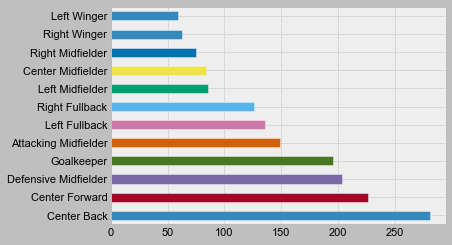

In [296]:
# Which position received the most red cards?
plt.style.use('bmh')
dfplayer.position.value_counts().plot(kind='barh')
plt.show()

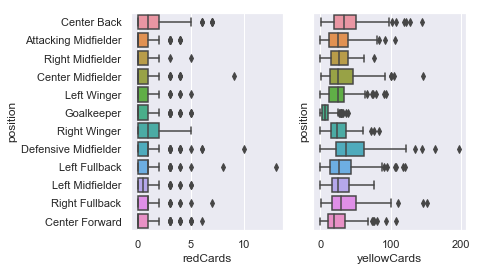

In [96]:
# Player position correlated with receiving a card?

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.boxplot(data=dfplayer, y='position', x='redCards', orient='h', ax=ax1)
sns.boxplot(data=dfplayer, y='position', x='yellowCards', orient='h', ax=ax2)
plt.show()

Analyses:
- Receiving a red card is **not** rare in this sample. 1010 out of 2053 players received at least one red card and over 20% of players received more than 1 red cards during the 2012-13 season. 
- Position dose not play a major role in explaining the probability of receiving a red card.
- **It is not plausible to make analysis at the player level later given the data issues listed above.**

### Referee level analysis

In [105]:
# collapse player-referee sample to referee level

dfref = df.groupby('refNum').agg({'yellowCards':'sum',
                                 'redCards':'sum',
                                 'Alpha_3':'first',
                                 'meanIAT':'first',
                                 'seIAT':'first',
                                 'meanExp':'first',
                                 'seExp':'first'})

dfref.sample(5)

,yellowCards,redCards,Alpha_3,meanIAT,seIAT,meanExp,seExp
refNum,,,,,,,
2445,0,0,VEN,0.395414,0.001351,0.935185,0.007281
437,0,0,PRT,0.396803,0.000392,0.790366,0.001798
2431,0,0,THA,0.352264,0.000683,0.590062,0.002807
2026,11,1,SCOT,0.326690,0.000010,0.356446,0.000037
2144,5,0,TUN,0.167132,0.027327,-0.789474,0.111757


In [108]:
# Summary statistics: number of redCard or yellowCard

print('The number of referees who gave red card(s): %.0f' % (dfref['redCards']>0).sum() )
print('The number of referees who gave more than one red card(s): %.0f' % (dfref['redCards']>1).sum() )
dfref[['yellowCards', 'redCards']].describe().round(3)

The number of referees who gave red card(s): 558
The number of referees who gave more than one red card(s): 256


,yellowCards,redCards
count,3147.000,3147.000
mean,17.882,0.583
std,63.923,2.211
min,0.000,0.000
25%,0.000,0.000
50%,1.000,0.000
75%,7.000,0.000
max,821.000,26.000


In [110]:
# The most strict referee(s)
# referee with the largest number of red cards
display( dfref[dfref['redCards']==dfref['redCards'].max()] )
# referee with the largest number of yellow cards
display( dfref[dfref['yellowCards']==dfref['yellowCards'].max()] )

,yellowCards,redCards,Alpha_3,meanIAT,seIAT,meanExp,seExp
refNum,,,,,,,
2398,623,26,ENGL,0.32669,0.00001,0.356446,0.000037


,yellowCards,redCards,Alpha_3,meanIAT,seIAT,meanExp,seExp
refNum,,,,,,,
1214,821,16,ENGL,0.32669,0.00001,0.356446,0.000037


In [159]:
# Which countries are most of the referees come from?
top10 = dfref.groupby('Alpha_3').redCards.count().sort_values(ascending=False).head(10)
display(top10) # type = Series

Alpha_3
DEU     573
ESP     209
ENGL    183
ITA     111
BRA      90
FRA      86
TUR      75
BEL      74
GRC      64
AUT      58
Name: redCards, dtype: int64

pandas.core.series.Series

In [245]:
# Filter the top 10 referee home countries with bias statistics

dfcountry = df[df.Alpha_3.isin(top10.index)]\
            .groupby('Alpha_3')\
            .agg({'meanIAT':'first',
                  'meanExp':'first'})\
            .join(top10.to_frame())
dfcountry.rename(columns={'redCards':'nRef'}, inplace=True)
dfcountry.sort_values(by='meanIAT',ascending=False, inplace=True)
dfcountry.reset_index(inplace=True)
dfcountry

,Alpha_3,meanIAT,meanExp,nRef
0,ITA,0.386174,0.529815,111
1,ESP,0.369894,0.588297,209
2,BRA,0.368946,0.637172,90
3,BEL,0.362720,0.568785,74
4,TUR,0.354707,0.182081,75
5,AUT,0.337539,0.394139,58
6,DEU,0.336628,0.335967,573
7,FRA,0.334684,0.336101,86
8,ENGL,0.326690,0.356446,183
9,GRC,0.326391,0.396000,64


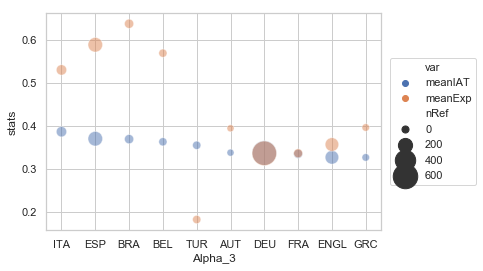

In [271]:
# Stack the two stats with country_name as ID 
stack = dfcountry.set_index(['Alpha_3', 'nRef']).stack().reset_index()
stack.rename(columns={'level_2':'var', 0:'stats'}, inplace=True)

# Plot the two stats across major referee home countries
sns.set_style('whitegrid')
sns.scatterplot(data=stack, x='Alpha_3', y='stats',
                size='nRef', sizes=(50, 600),
                hue='var', alpha=.5)
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

In [113]:
# correlation between number of cards and country bias
dfref[['yellowCards', 'redCards', 'meanIAT', 'meanExp']].corr()

,yellowCards,redCards,meanIAT,meanExp
yellowCards,1.000000,0.896056,0.007732,-0.013851
redCards,0.896056,1.000000,0.006581,-0.014862
meanIAT,0.007732,0.006581,1.000000,0.804224
meanExp,-0.013851,-0.014862,0.804224,1.000000


Analyses:
- It is not possible to tell how strict referees are since the number of games each referee attended is not available. So the probability of giving red card is not known.
- Since each referee can give yellow or red cards to multiple players in one game and without the information about the number of games they attend, it is not clear if giving over 800 yellow cards is insane. 
- The correlation between the number of yellow and red cards is strong suggesting referees are consistent about their judgements. The two opinion measures at the country level also appear to be strongly correlated. However, little evidence is found for a linear correlation between referee home country bias and the number of cards they give.

### Skin color ratings

In [151]:
dfplayer2 = df.groupby('playerShort').agg({'rater1':'first', 'rater2':'first'}).dropna()
dfplayer2['same'] = (dfplayer2.rater1 == dfplayer2.rater2)*1

print('The share of players who receive the same color ratings is %.2f. ' % (dfplayer2['same'].mean()) )
print('The correlation between two raters is %.2f.' % (dfplayer2.corr(method='pearson').iloc[0,1]) )

pd.crosstab(dfplayer2.rater1, dfplayer2.rater2, margins=True)

The share of players who receive the same color ratings is 0.76. 
The correlation between two raters is 0.92.


rater2,0.0,0.25,0.5,0.75,1.0,All
rater1,,,,,,
0.0,424,200,2,0,0,626
0.25,27,470,54,0,0,551
0.5,0,23,116,31,0,170
0.75,0,0,2,104,34,140
1.0,0,0,0,6,92,98
All,451,693,174,141,126,1585


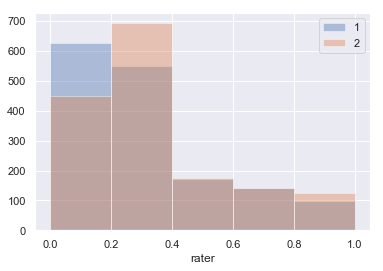

In [141]:
# Distribution of skin color rated by two raters

sns.distplot(dfplayer2['rater1'], bins=5, kde=False, label='1')
sns.distplot(dfplayer2['rater2'], bins=5, kde=False, label='2')
plt.xlabel('rater')
plt.legend()
plt.show()

### Skin color vs. red cards

In [300]:
# collapse player-referee sample to player level
# with skin color ratings and number of red cards received

dfplayer3 = (df.groupby('playerShort')
             .agg({'redCards':'sum',
                   'rater1':'first',
                   'rater2':'first'})
            )
dfplayer3.head()

,redCards,rater1,rater2
playerShort,,,
aaron-hughes,0,0.25,0.00
aaron-hunt,1,0.00,0.25
aaron-lennon,0,0.25,0.25
aaron-ramsey,1,0.00,0.00
abdelhamid-el-kaoutari,2,0.25,0.25


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


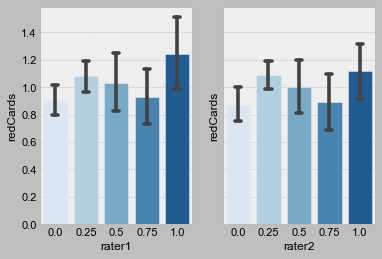

In [299]:
# Is darker skin associated with a higher likelihood of red card?
# Answer: no significant difference

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.barplot(data=dfplayer3, x='rater1', y='redCards',
            palette='Blues', capsize=.2, ax=ax1)
sns.barplot(data=dfplayer3, x='rater2', y='redCards',
            palette='Blues', capsize=.2, ax=ax2)
plt.show()

## Regression methods
- Generalized Linear Models (GLM)

### Poisson for count data
- Model: f(y_ij) = b0 + b1\*color_i + b2\*X_i + b3\*X_j + b4\*X_ij + e, where
- **i** indicates player and **j** indicates referee
- **y_ij**: number of red card(s) referee j gave player i. `redCards`
- **color_i**: skin color of player i. `rater1`, `rater2`
    - `avgcolor` = mean(rater1, rater2)
    - `dark1` = mean(rater1, rater2) > 0.5
    - `dark2` = mean(rater1, rater2) > 0.5
- X_i: player characteristics which includes height (dropped due to concerns of multicolinearity), weight, position, birthday, club
- X_j: referee characteristics which mainly vary across referee home countries **c**, such as meanIAT, meanExp
- X_ij: dyads level features such as number of victories, ties, defeats, and goals when player i and referee j encountered

In [28]:
## Import packages

import statsmodels.api as sm
from patsy import dmatrices 
from statsmodels.iolib.summary2 import summary_col

In [29]:
## Define variables

df.dropna(inplace=True) # drop obs without skin color rating

df['avgcolor'] = df[['rater1', 'rater2']].mean(axis=1)
df['dark1'] = (df.avgcolor >= 0.5)*1
df['dark2'] = (df.avgcolor >= 0.75)*1

df['birthyr'] = df['birthday'].str[-4:].astype(int)

In [30]:
# avgcolor
y, X1 = dmatrices('redCards ~ avgcolor \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y, X2 = dmatrices('redCards ~ avgcolor \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)
y, X3 = dmatrices('redCards ~ avgcolor \
                  + birthyr + weight + position + club \
                  + C(refNum) \
                  + games + victories + defeats', df)

# dark1
y, X4 = dmatrices('redCards ~ dark1 \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y, X5 = dmatrices('redCards ~ dark1 \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)
y, X6 = dmatrices('redCards ~ dark1 \
                  + birthyr + weight + position + club \
                  + C(refNum) \
                  + games + victories + defeats', df)

# dark2
y, X7 = dmatrices('redCards ~ dark2 \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y, X8 = dmatrices('redCards ~ dark2 \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)
y, X9 = dmatrices('redCards ~ dark2 \
                  + birthyr + weight + position + club \
                  + C(refNum) \
                  + games + victories + defeats', df)


In [7]:
## Fit Poisson models.

reg1 = sm.GLM(y, X1, family=sm.families.Poisson()).fit()
reg2 = sm.GLM(y, X2, family=sm.families.Poisson()).fit()
reg3 = sm.GLM(y, X3, family=sm.families.Poisson()).fit()

In [9]:
reg4 = sm.GLM(y, X4, family=sm.families.Poisson()).fit()
reg5 = sm.GLM(y, X5, family=sm.families.Poisson()).fit()
reg6 = sm.GLM(y, X6, family=sm.families.Poisson()).fit()

In [10]:
reg7 = sm.GLM(y, X7, family=sm.families.Poisson()).fit()
reg8 = sm.GLM(y, X8, family=sm.families.Poisson()).fit()
reg9 = sm.GLM(y, X9, family=sm.families.Poisson()).fit()

In [13]:
## Summary of results

summary_col([reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8, reg9], 
            model_names=['Poisson','FEc', 'FEj','Dark.5','FEc', 'FEj','Dark.75','FEc', 'FEj'],
            stars=True, float_format='%0.3f',
            regressor_order=['avgcolor', 'dark1', 'dark2',
                             'weight', 'birthyr',
                             'games', 'victories', 'defeats',
                             'meanIAT', 'meanExp'],
            drop_omitted=True,
            info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                       'Deviance':lambda x: "{:.2f}".format(x.deviance), 
                       'df_model':lambda x: "{:.0f}".format(x.df_model)})


,Poisson I,FEc I,FEj I,Dark.5 I,FEc II,FEj II,Dark.75 I,FEc III,FEj III
avgcolor,0.139,0.180*,0.192*,,,,,,
,(0.100),(0.101),(0.103),,,,,,
dark1,,,,0.082,0.095,0.112,,,
,,,,(0.068),(0.069),(0.070),,,
dark2,,,,,,,0.112,0.163**,0.176**
,,,,,,,(0.080),(0.080),(0.081)
weight,0.005,0.007,0.006,0.005,0.007,0.006,0.005,0.006,0.006
,(0.005),(0.005),(0.005),(0.005),(0.005),(0.005),(0.005),(0.005),(0.005)
birthyr,-0.004,-0.008,-0.016**,-0.004,-0.008,-0.016**,-0.004,-0.008,-0.016**
,(0.007),(0.007),(0.008),(0.007),(0.007),(0.008),(0.007),(0.007),(0.008)


Analysis of results:
- In general, positive relationship between skin color and number of red cards. 
- There seems to be predudice according to referee home country.
- With referee fixed effect, color is still positive and significant, meaning it is not bias generated by certain predudice referees.
- Add referee FE does not seem to improve prediction: change of deviance < change of df

#### NB for overdispersion
- Negative binomial regression [weblink](https://stats.idre.ucla.edu/r/dae/negative-binomial-regression/) 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


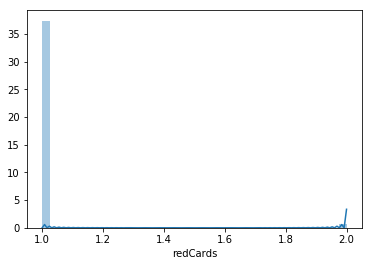

In [19]:
## check for overdispersion

## 1. draw distribution of y conditional on non-zero values

sns.distplot(df[df.redCards>0].redCards)
plt.show()

In [24]:
## 2. Calculate chi2-df ratio (>1 overdispersion)

ratio = reg2.pearson_chi2/reg2.df_resid
print(ratio)

0.8781788213474475


In [22]:
## Fit Negative Binomial models.

# avgcolor
reg21 = sm.GLM(y, X1, family=sm.families.NegativeBinomial()).fit()
reg22 = sm.GLM(y, X2, family=sm.families.NegativeBinomial()).fit()
# dark1
reg24 = sm.GLM(y, X4, family=sm.families.NegativeBinomial()).fit()
reg25 = sm.GLM(y, X5, family=sm.families.NegativeBinomial()).fit()
# dark2
reg27 = sm.GLM(y, X7, family=sm.families.NegativeBinomial()).fit()
reg28 = sm.GLM(y, X8, family=sm.families.NegativeBinomial()).fit()

In [23]:
## Summary of results

summary_col([reg21, reg22, reg24, reg25, reg27, reg28], 
            model_names=['NB','FEc', 'Dark.5','FEc', 'Dark.75','FEc'],
            stars=True, float_format='%0.3f',
            regressor_order=['avgcolor', 'dark1', 'dark2',
                             'weight', 'birthyr',
                             'games', 'victories', 'defeats',
                             'meanIAT', 'meanExp'],
            drop_omitted=True,
            info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                       'Deviance':lambda x: "{:.2f}".format(x.deviance), 
                       'df_model':lambda x: "{:.0f}".format(x.df_model)})


,NB I,FEc I,Dark.5 I,FEc II,Dark.75 I,FEc III
avgcolor,0.146,0.185*,,,,
,(0.101),(0.103),,,,
dark1,,,0.084,0.097,,
,,,(0.069),(0.070),,
dark2,,,,,0.116,0.166**
,,,,,(0.081),(0.082)
weight,0.005,0.006,0.005,0.006,0.005,0.006
,(0.005),(0.005),(0.005),(0.005),(0.005),(0.005)
birthyr,-0.004,-0.007,-0.004,-0.008,-0.004,-0.008
,(0.007),(0.007),(0.007),(0.007),(0.007),(0.007)


### Logit for binary data
- Transform number of red cards to whether receiving red card(s).

In [11]:
# Create dummy which equals 1 if player i received red card from referee j

df['redDummy'] = (df.redCards > 0)*1

# avgcolor
y2, X1 = dmatrices('redDummy ~ avgcolor \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y2, X2 = dmatrices('redDummy ~ avgcolor \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)

# dark1
y2, X4 = dmatrices('redDummy ~ dark1 \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y2, X5 = dmatrices('redDummy ~ dark1 \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)

# dark2
y2, X7 = dmatrices('redDummy ~ dark2 \
                  + birthyr + weight + position + club \
                  + meanIAT + meanExp \
                  + games + victories + defeats', df)
y2, X8 = dmatrices('redDummy ~ dark2 \
                  + birthyr + weight + position + club \
                  + C(refCountry) \
                  + games + victories + defeats', df)


In [12]:
## Fit Logistic models.

reg31 = sm.GLM(y2, X1, family=sm.families.Binomial()).fit()
reg32 = sm.GLM(y2, X2, family=sm.families.Binomial()).fit()

reg34 = sm.GLM(y2, X4, family=sm.families.Binomial()).fit()
reg35 = sm.GLM(y2, X5, family=sm.families.Binomial()).fit()

reg37 = sm.GLM(y2, X7, family=sm.families.Binomial()).fit()
reg38 = sm.GLM(y2, X8, family=sm.families.Binomial()).fit()

In [13]:
## Summary of results

summary_col([reg31, reg32, reg34, reg35, reg37, reg38], 
            model_names=['Logit','FEc', 'Dark.5','FEc', 'Dark.75','FEc'],
            stars=True, float_format='%0.3f',
            regressor_order=['avgcolor', 'dark1', 'dark2',
                             'weight', 'birthyr',
                             'games', 'victories', 'defeats',
                             'meanIAT', 'meanExp'],
            drop_omitted=True,
            info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                       'Deviance':lambda x: "{:.2f}".format(x.deviance), 
                       'df_model':lambda x: "{:.0f}".format(x.df_model)})


,Logit I,FEc I,Dark.5 I,FEc II,Dark.75 I,FEc III
avgcolor,0.143,0.183*,,,,
,(0.103),(0.104),,,,
dark1,,,0.089,0.102,,
,,,(0.070),(0.071),,
dark2,,,,,0.112,0.164**
,,,,,(0.082),(0.083)
weight,0.006,0.008,0.006,0.007,0.006,0.007
,(0.005),(0.005),(0.005),(0.005),(0.005),(0.005)
birthyr,-0.003,-0.007,-0.004,-0.007,-0.004,-0.007
,(0.007),(0.007),(0.007),(0.007),(0.007),(0.007)


### Zero Inflated Models
- Remember the share of zeros in the sample is 98.7%.
- The standard distributions, either Poisson, Binomial, or Negative Binomial, is not sufficient to decribe the presence of extra zeros.
- The Zero Inflated Poisson (ZIP) model, for example, allows a different data generating process (DGP) for zeros than for counts conditional on non-zero values. ([Example](https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057))
- As explained before, some referees in the sample seem to be assistant referees and do not have the power to give red cards. It generates excessive zeros especially at the dyads level where each assitant referee will be matched to at leaset 22 players for each game he attended.
- Tried but Error messages arise when running MLE.
    - reg = sm.ZeroInflatedPoisson(y, X2, exog_infl=X2, inflation='logit').fit()

## Machine learning methods

In [317]:
df.columns

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')